# Метод наименьших квадратов

Предположим, что нам требуется найти некоторую ф-ю f(x) как сумму некоторых известных (базисных) функций, взятых с постоянными коэффициентами
$$
f(x) = a_1 f_1(x) + a_2 f_2(x) + ... + a_m f_m(x)
$$
при этом известны значения ф-и f(x_i) = y_i для $n$ узлов. Также пусть $n>m$. В этом случае система на коэффициенты $a$, $Aa = y$, будет переопределенной. Для ее решения можно использовать метод, называемый Методом наименьших квадратов. Суть подобрать коэффициенты так, что решение было наилучшем в смысле минимизации среднеквадратичного отклонения по всем узлам:
$$
S = \sum_{i=1}^{n} \left(y_i - \sum_{j=1}^{m}a_j f_j(x_i)\right)^2
$$
несложно проверить, что минимизация $S$ даст систему вида $A^TAa = A^Tb$, решение которой и даст значения коэффициентов $a_i$.

# Задача на аппроксимацию с помощью МНК

Согласно термодинамическим таблицам Глушко, энергия Гиббса метана определяется соотношением $G =  256.0495 + 40.9175 \log(t) + -0.0253751 t^{-2} + 1.78548 t^{-1} + 240.1261 t + -173.732 t^2 + 72.624 t^3$, где $t = T/10000$, $T$ - температура. Если сравнить аппроксимацию Глушко с энергией Гиббса из термодинамических таблиц NIST, получим следующий результат.

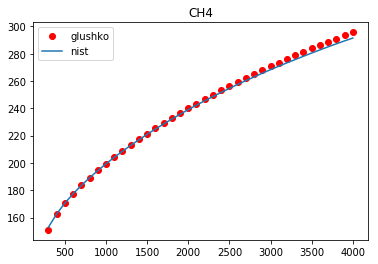

In [3]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

#ф-я, которая задает аппроксимацию энергии Гиббса по Глушко
def GlushkoG(T, a):
    t = T/10000
    return a[0] + a[1]*np.log(t) + a[2]*t**(-2) + a[3]*t**(-1) + a[4]*t + a[5]*t**2 + a[6]*t**3

#коэффициенты в аппроксимации для метана по Глушко
# 0        ln       -2          -1        1        2      3
CH4_appr = np.array([256.0495, 40.9175, -0.0253751,1.78548,240.1261, -173.732, 72.624])

# читаем данные из таблицы NIST
CH4_nist = np.loadtxt("CH4_nist.txt", usecols = (0,3))
# после чтения таблицы в двумерном массиве CH4_nist в первом столбце будут темепратуры,
# во втором - энергия Гиббса для этих температур
dH_CH4 = 10.016*1000
for i in range(0, CH4_nist[:,0].size):
    CH4_nist[i,1] -= dH_CH4/CH4_nist[i,0]

# отрисовываем аппроксимацию Глушко вместе с точками из таблицы NIST
plt.plot(CH4_nist[:,0],GlushkoG(CH4_nist[:,0], CH4_appr), 'or', label = 'glushko')
                                #как будет подписан график в легенде
plt.plot(CH4_nist[:,0],CH4_nist[:,1], label = 'nist')
#plt.plot(CH4_nist[:,0],np.abs(CH4_nist[:,1] - GlushkoG(CH4_nist[:,0], CH4_appr))/CH4_nist[:,1]*100, label = 'err')
plt.title('CH4')
plt.legend(loc = 'upper left') #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять

Видно, что для высоких температур есть рассхождение аппроксимации Глушко с таблицами NIST. Необходимо так скорректировать коэффициенты, чтобы это рассхождение стало меньше. Для этого используем МНК.

In [4]:
import numpy as np
import scipy.linalg as la

# вычисляем значением базисных ф-й для всех значений температур таблицы NIST
def basisFuncMatrix(Temps):
    A = np.zeros((Temps.size, 7)) 
    for i in range(Temps.size):
        t = Temps[i]/10000
        A[i][0] = 1
        A[i][1] = np.log(t)
        A[i][2] = t**(-2)
        A[i][3] = t**(-1)
        A[i][4] = t
        A[i][5] = t**2
        A[i][6] = t**3 
    return A

A = basisFuncMatrix(CH4_nist[:,0])
# решаем систему МНК
CH4_new_appr = la.solve(A.T.dot(A), A.T.dot(CH4_nist[:,1]))

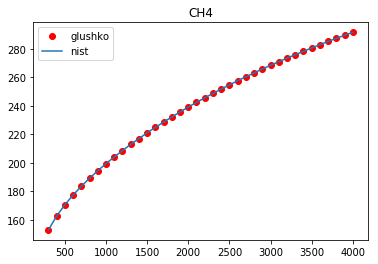

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt

CH4_nist = np.loadtxt("CH4_nist.txt", usecols = (0,3))
for i in range(0, CH4_nist[:,0].size):
    CH4_nist[i,1] -= dH_CH4/CH4_nist[i,0]

# здесь используем новые коэффициенты в аппроксимации CH4_new_appr
plt.plot(CH4_nist[:,0],GlushkoG(CH4_nist[:,0], CH4_new_appr), 'or', label = 'glushko')
                                #как будет подписан график в легенде
plt.plot(CH4_nist[:,0],CH4_nist[:,1], label = 'nist')
#plt.plot(CH4_nist[:,0],np.abs(CH4_nist[:,1] - GlushkoG(CH4_nist[:,0], CH4_appr))/CH4_nist[:,1]*100, label = 'err')
plt.title('CH4')
plt.legend(loc = 'upper left') #отрисовываем легеду. Здесь в верхнем левом углу, но можно поменять

Теперь видно, что совпадение лучше.

# Задача динамического рассеяния света (DLS)

Решение задачи динамического рассеяния света (DLS) позволяет определять размеры частиц в растворе по спектру интенсивности рассеяного света. Если растворе представлен один сорт частиц, то спектр итенсивности для нее определяется кривой Лоренца:
$$
I(f) = \frac{A}{\pi} \frac{\Gamma}{(2\pi f)^2 + \Gamma^2}
$$
Здесь $f$ - частота, $\Gamma$ - характеристика частицы, обратно пропорциональная ее диаметру.

Для раствора, содержащего $n$ частиц, спектр интенсивности есть сумма Лоренцов для каждой отдельной частицы, взятых с определенным весом, пропорциональным их концентрации:
$$
I(f) = \frac{1}{\pi} \sum_{i=1}^n\frac{A(\Gamma_i)\Gamma_i}{(2\pi f)^2 + \Gamma_i^2}
$$

В результате эксперимента методом DLS получается кривая интенсивности рассеяния, по которой необходимо определить частицы каких размеров представлены в растворе. Предполагая, что 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import sklearn.linear_model as sklm
import scipy

# основные константы. В этой части определяется все, что связано с постановкой эксперимента
kb = 1.38064e-23 # постоянная Больцмана
T = 273.15 + 22 # температура в K
theta = np.pi/2 # угол рассеяния
n = 1.333 # показатель преломления
eta = 0.958e-3 # Н * с/м^2 - динамическая вязкость воды
l = 650e-9 # Длина волны лазера

# далее задаем коэффициент, связывающий характеричтику Gamma с размером частицы
coeff = 2*(kb * T/(3 * np.pi * eta)) * (4 * np.pi * n / l)**2 * np.sin(theta/2)**2
d1 = 200e-9
G1 = coeff / d1 # Gamma для частицы размером 200 нм
d2 = 100e-
G2 = coeff / d2

# определяем кривые Лоренца для частиц
w = 2.0*np.arange(1,5001)
y1 = G1 / ((2 * np.pi * w)**2 + G1**2)
y2 = G2 / ((2 * np.pi * w)**2 + G2**2)
y = y1 + y2
#y = y1

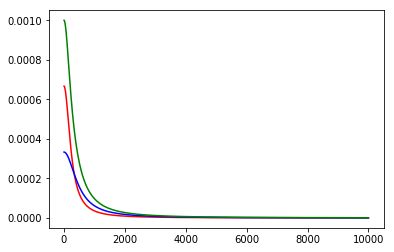

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

# кривая Лоренца
plt.plot(w, y1, 'red')
plt.plot(w, y2, 'blue')
plt.plot(w, y, 'green')

In [8]:
# диапазон размеров частиц, где ищем нужный размер 
d_min = 1e-9 # 1 нм
d_max = 1e-6 

# задаем сетку по Gamma
G_min = coeff/d_max
G_max = coeff/d_min
N = 256*8 # Число узлов в сетке по \Gamma
M = w.size # Число точек по частоте
p = (G_max/G_min)**(1/(N-1))
G = np.zeros(N)

# неравнмерная сетка со сгущением к нулю (так как больщий вклад в интенсивность дают крупные частицы)
# хотя такая сетка - это не единственно возможный вариант
for j in range(N):
    G[j] = G_min * (p**j)

# вот равномерная сетка
# G = np.linspace(G_min, G_max, N)    

A = np.zeros((M,N))

# Матрица коэффициентов (составляется по базисным ф-ям)
for i in range(M):
    for j in range(N):
        A[i,j] = G[j] / ((2 * np.pi * w[i])**2 + G[j]**2)  

(1.0, 1000.0)

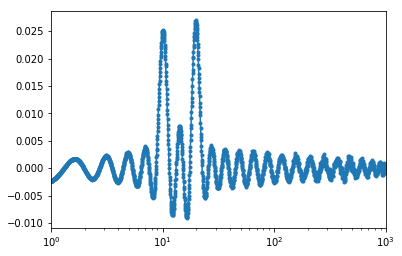

In [34]:
# Три метода решения переопределенной системы: Тихоновская регуляризация, неотрицательная Тихоновская регялризация и метод Лассо

# # Ridge regression
# clf = sklm.Ridge(alpha = 5e-7)
# clf.fit(A, y)
# a1 = clf.coef_

# fig = plt.figure()
# ax = plt.subplot(3,1,1)
# line, = plt.plot(1e+9 * coeff/G, a1,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)

# # Non-negative ridge regression
# alpha = 1.3e-7
# B = np.zeros((M+N, N))
# B[0:M,:] = A
# B[M::, :] = alpha * np.eye(N)
# y_ = np.zeros(M+N)
# y_[0:M] = y
# a2, rnorm = scipy.optimize.nnls(B,y_)

# ax = plt.subplot(3,1,2)
# line, = plt.plot(1e+9 * coeff/G, a2,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)

    
#MNK
# MTM_inv = np.linalg.inv(np.dot(A.T, A))
# MTy = np.dot(A.T, y)
# a3 = np.dot(MTM_inv, MTy)
# # print(a4)

# # w = 2.0*np.arange(1,5001)
# # sum = 0
# # for j in range(N):
# #     sum += G[j] / ((2 * np.pi * w)**2 + G[j]**2)  * np.abs(a3[j])  / np.abs(np.max(a3)) / 4.3

# # plt.plot(w, sum, 'green')
# # plt.plot(w, y, 'red')
# # ax = plt.subplot(3,1,3)
# # line, = plt.plot(1e+9 * coeff/G, np.abs(a3),'.-')
# # ax.set_xscale('log')
# # plt.xlim(d_min*1e9, d_max*1e9)


# # Lasso regression
# clf = sklm.LassoCV()
# clf.fit(A, y)
# a3 = clf.coef_

# fig = plt.figure()
# ax = plt.subplot(3,1,3)
# line, = plt.plot(1e+9 * coeff/G, a3,'.-')
# ax.set_xscale('log')
# plt.xlim(d_min*1e9, d_max*1e9)

clf = sklm.LinearRegression()
clf.fit(A,y)
a3 = clf.coef_

# ax = plt.subplot(5,1,1)
# fig = plt.figure()
ax = plt.gca()
line, = plt.plot(1e+9 * coeff/G, a3,'.-')
ax.set_xscale('log')
plt.xlim(d_min*1e9, d_max*1e9)

In [35]:
# определяем размер частицы, для которой получился максимальный коэффициент
import scipy.signal
indexes, _ = scipy.signal.find_peaks(a3, height=0.02, distance=50)
print('Peaks are: %s' % (1e+9*coeff/G[indexes]))
# i, = np.where( a2==max(a2) )
# print('Particle size = ', 1e+9*coeff/G[i])

Detect peaks with minimum height and distance filters.
Peaks are: [19.8831683 10.1245031]
